## ビジネスマンがきちんと学ぶディープラーニング
### 5章 質的な分類を行うディープラーニング
#### 1．質的分類のための関数  
・多項ロジット（ソフトマックス関数）  

効用$U$が定数効用$V$（説明変数の線形和）と確率変動$ϵ$に従う  
$U=V+\epsilon=w^Tx+b+\epsilon$  
$\epsilon$はガンベル分布  

消費者$i$が製品$j$を選択する確率$p_{ij}$  
$p_{ij}=\frac{\displaystyle \exp(w_j^Tx_{ij}+b_j )}{\displaystyle \sum_{k=1}^m \exp (w_k^Tx_{ik}+b_k)}$  

定数効用部分を$ν$とすると  
$p_{j}=\frac{\displaystyle \exp(\nu_j)}{\displaystyle \sum_{k=1}^m \exp (\nu_k)}$  

$m$個の複数の選択肢の中から$j$を選択する確率は指数化定数の構成比となる  

・多項ロジットの注意点  
※データの測定単位が異なると選択確率が変わってしまう

・ソフトマックス関数の微分  
$p_{j}=\frac{\displaystyle \exp(y_j)}{\displaystyle \sum_{k=1}^m \exp (y_k)}$  

$y_j$で微分する場合（途中略）  
$\frac{\displaystyle \partial p_j}{\displaystyle \partial y_j}=\frac{\displaystyle \partial}{\displaystyle \partial y_j}\left( \frac{\displaystyle \exp(y_j)}{\displaystyle \sum_k \exp(y_k)}\right)=p_j(1-p_j)$  

$y_k$で微分する場合（途中略）  
$\frac{\displaystyle \partial p_j}{\displaystyle \partial y_k}=\frac{\displaystyle \partial}{\displaystyle \partial y_k}\left( \frac{\displaystyle \exp(y_j)}{\displaystyle \sum_k \exp(y_k)}\right)=-p_j p_k$  


#### 2．質的分類のための損失関数  
・交差エントロピー  
教師信号$t$  
予測確率$p$  
教師信号は選択したカテゴリのみ1、他は0のベクトル  
予測確率は各カテゴリごとの予測確率（合計1）  
$\mathcal{cross}=-\frac{\displaystyle 1}{\displaystyle N} \displaystyle \sum_{i=1}^{N} \displaystyle \sum_{j=1}^{m}\{t_{ij}\log(p_{ij}) \}$  
予測するデータのサンプル数$N$  
カテゴリ選択肢の数$m$  

教師信号1のカテゴリの予測確率の対数が個人のエントロピー  
尤度関数のようにサンプルごとの情報量を合計（対数をとることで$\prod$から$\sum$）  
交差エントロピーを最小化するようにモデルパラメータを調整する


#### 3．ネットワークモデル  
3層のニューラルネットワーク（p92図）  
入力層：4変数  
隠れ層：10ユニット（ReLU変換）  
出力層：3変数（softmax変換）  
損失関数：交差エントロピー    

#### 4．フォワードステップ  
step0：$W_1$と$W_2$の初期値を設定（乱数）  
step1：$W_1$で加重計算  
step2：ReLU関数による変換  
step3：$W_2$で加重計算  
step4：ソフトマックス関数による変換  

#### 5．バックワードステップ  
step5：損失関数の計算  
step6：$W_2$の偏微分  
step7：$W_1$の偏微分  
step8：$W_1$，$W_2$のパラメータ更新  
step1へ戻る  

#### ・ウェイト$W_2$の偏微分（step5～step6）  
個人の損失関数を$ent$とする  
$ent=-\displaystyle \sum_{j} t_i log(p_j)$  
$\displaystyle  \frac{\partial ent}{\partial w_jl}=\frac{\partial ent}{\partial y_j} \frac{\partial y_j}{\partial w_jl}$  
$l$は隠れ層のユニット数  
$l=1,2,\ldots,L$  

上記の右辺第1項  $\frac{\partial ent}{\partial y_j}$  
$\displaystyle \frac{\partial ent}{\partial p}=\frac{\partial}{\partial p}\left(-t_1log p_1-t_2log p_2-t_3 log p_3 \right)=\left[ \begin{array}{c}
-t_1/p_1 \\
-t_2/p_2 \\
-t_3/p_3
\end{array} \right] = \mathcal{G}p$  
$\displaystyle \frac{\partial p}{\partial y_1}=\frac{\partial}{\partial y_1}
\left[ \begin{array}{c}
p_1 \\
p_2 \\
p_3
\end{array} \right]=
\left[ \begin{array}{c}
p_1(1-p) \\
-p_1 p_2 \\
-p_1 p_3
\end{array} \right] = \mathcal{G}y_1$  
$\displaystyle \frac{\partial ent}{\partial y_1}=\left( \mathcal{G}y_1, \mathcal{G}p \right)=p_1(t_1+t_2+t_3)-t_1=p_1-t_1$  
以下$y_2, y_3$と同じ、ベクトルとしてまとめると  
$\displaystyle \frac{\partial ent}{\partial y}=p-t$  

## ベースコード：ビジネスマンがきちんと学ぶディープラーニングのpythonコード

In [1]:
# libraryの読み込み
import numpy as np
import pandas as pd
np.set_printoptions(precision = 3, suppress = True)

## 画像認識のためのサンプルデータ：KerasにあるMNIST

アメリカNISTによる手書きの数字集（MNIST)をサンプルデータとして使います。pythonのKerasにあるデータセットから呼び出します。

In [2]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

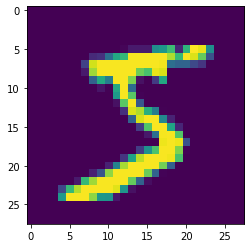

In [4]:
import matplotlib.pyplot as plt
img = train_images[0]
plt.imshow(img)
plt.show()

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

パーセプトロンへの入力層へデータを入力するため、二次元データ（28×28）を一次元化。  
また、コントラスト情報（256諧調）を0～1に規格化。

In [6]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
train_images.shape

(60000, 784)

In [7]:
train_images[0]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

この先は後藤さんのコードにあわせてゆきます。サンプル数は「ビジネスマンがきちんと学ぶディープラーニング」教科書と同じく60000→300に落とします。

In [8]:
df = pd.DataFrame(train_images[0:300])
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train_labels[0:300]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4,
       5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9,
       9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
       9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8,
       3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5,
       2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6,
       3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7,
       9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9,
       6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6], d

説明変数784からなる10クラス（ブランド）の分類問題となります。

In [10]:
x = np.array(df)
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
x.shape

(300, 784)

In [12]:
# 説明変数行列の作成
X = np.array(df.iloc[0:, 0:784]).T
X[0:, 0:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
X.shape

(784, 300)

In [14]:
df_label = pd.DataFrame(train_labels[0:300])

In [15]:
brand_sel =  np.array(df_label.iloc[0:, 0])
brand_sel

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4,
       5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9,
       9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
       9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8,
       3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5,
       2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6,
       3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7,
       9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9,
       6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6], d

In [16]:
brand_sel.shape

(300,)

In [17]:
# 選択ブランドベクトルの作成
T = np.eye(11)[brand_sel+1][0:, 1:].T # デザイン行列に変更
df_T=pd.DataFrame(T)
df_T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
T.shape

(10, 300)

In [19]:
# 分析のための関数の定義
# ソフトマックス関数
def softmax(x):
    mx = x.max(axis = 0)
    xd = x - mx
    u = np.exp(xd)
    return (u / u.sum(axis = 0))

# クロスエントロピー
def cross_e(t,p):
    delta = 1e-7
    return -np.mean(np.sum(t * np.log(p + delta), axis = 0))

# ReLU関数
def ReLU(x):
    return np.maximum(x, 0)

# step関数（ReLU微分）
def step(x):
    return 1.0 * (x > 0)

In [20]:
# 分析のためのデータ準備
N = X.shape[1]  # 分析ケース数、しばしば消費者の数
M = np.unique(brand_sel).shape[0]    # 予測したいグループ数（ブランドやセグメントの数）
L = 64   # 隠れ層ユニット数
K = X.shape[0] + 1    # 説明変数の数＋定数項
vec1 = np.ones((1, N))   # 1を要素としたＮ次のベクトル
Xex  = np.vstack([X, vec1]) # 定数項を含む説明変数行列

In [21]:
print("ケース数 N =", N)
print("予測グループ数 M =", M)
print("隠れ層ユニット数 L =", L)
print("説明変数+定数項 K =", K)
print("説明変数行列（10×300）\n", Xex)

ケース数 N = 300
予測グループ数 M = 10
隠れ層ユニット数 L = 64
説明変数+定数項 K = 785
説明変数行列（10×300）
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]]


In [22]:
# ウェイト初期値設定
np.random.seed(1234)
W1 = np.random.randn(L, K) # 正規分布乱数 W1初期値
W2 = np.random.randn(M, L+1) # 正規分布乱数 W2初期値

In [23]:
W1.shape, W2.shape

((64, 785), (10, 65))

In [24]:
# ここからイテレーションスタート
for ite in range(10):
# フォワードステップ
    S = W1 @ Xex # W1で加重計算（入力層～隠れ層）
    Z = ReLU(S) # ReLUによる変換
    Zex = np.vstack([Z, vec1]) # 切片項追加
    Y = W2 @ Zex # W2で加重計算（隠れ層～出力層）
    P = softmax(Y) # softmax変換
    cross = cross_e(T, P) # 損失関数計算

# バックワードステップ
    Dif = P - T # ent/p, p/yの偏微分
    DW2 = Dif @ Zex.T # W2の偏微分
    W2b = W2[ : , :L] # 定数項分をカット(3×10)
    DW1 = ((W2b.T @ Dif) * step(S)) @ Xex.T # W1の偏微分

# パラメータ更新 ステップ幅は0.001　
    W1 = W1 - 0.001 * DW1
    W2 = W2 - 0.001 * DW2

# イテレーション終了後の適合度
print('イテレーション終了')
print('iteration =', ite, '交差エントロピー =', cross)

イテレーション終了
iteration = 9 交差エントロピー = 2.2342655204697532


In [25]:
model_res = np.argmax(P, axis = 0)
model_res

array([3, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 9, 2, 8, 0, 8, 4, 0,
       2, 1, 5, 0, 9, 3, 2, 7, 3, 8, 6, 7, 8, 7, 6, 0, 4, 6, 1, 8, 0, 6,
       3, 4, 8, 6, 3, 3, 3, 0, 7, 1, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 1,
       6, 8, 0, 0, 1, 7, 1, 6, 3, 0, 3, 1, 1, 7, 8, 0, 2, 6, 7, 8, 7, 4,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 5,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 7, 0, 6, 7, 1, 8, 6, 4, 1, 5, 3, 4,
       5, 9, 8, 3, 3, 1, 5, 2, 7, 7, 4, 7, 8, 0, 8, 6, 2, 3, 4, 6, 1, 9,
       6, 6, 3, 3, 7, 2, 8, 3, 9, 4, 4, 6, 4, 9, 5, 0, 9, 1, 7, 5, 1, 5,
       9, 1, 4, 3, 2, 3, 3, 9, 1, 7, 6, 2, 8, 9, 1, 0, 0, 7, 4, 6, 7, 8,
       3, 7, 1, 7, 8, 3, 6, 8, 0, 3, 1, 0, 0, 1, 4, 6, 7, 3, 0, 4, 6, 5,
       2, 6, 4, 7, 3, 8, 3, 9, 4, 0, 3, 1, 6, 2, 0, 3, 5, 4, 6, 5, 1, 3,
       3, 7, 0, 8, 0, 9, 1, 0, 3, 1, 7, 5, 5, 8, 8, 4, 3, 5, 0, 6, 5, 7,
       2, 8, 8, 9, 7, 1, 1, 4, 4, 5, 3, 4, 1, 5, 6, 3, 9, 3, 0, 0, 3, 9,
       6, 5, 7, 4, 1, 5, 3, 0, 4, 8, 0, 4, 3, 6], d

In [26]:
# DLによる判別結果
model_res = np.argmax(P, axis = 0) # DL予測の結果
pd.crosstab(brand_sel, model_res, margins = True) # 教師データ

col_0,0,1,2,3,4,5,6,7,8,9,All
row_0,,,,,,,,,,,
0,31,0,0,1,0,0,1,0,1,0,34
1,0,33,0,1,0,1,0,1,3,0,39
2,1,2,10,2,1,4,2,5,0,1,28
3,0,0,0,29,1,2,0,1,1,0,34
4,0,1,1,1,28,0,0,0,0,1,32
5,3,1,0,3,0,12,2,1,1,0,23
6,1,0,0,2,0,1,24,0,1,0,29
7,1,0,1,2,2,1,0,21,0,1,29
8,0,2,0,0,0,0,0,0,19,0,21


正解率は77%